<a href="https://colab.research.google.com/github/Madihajavaid12345/Sales_Prediction_Project_Data_zenux/blob/main/DATA_ZENUX_PROJECT_5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Project Title

###  sales Prediction Using Linear Regression in Python

### Project Overview

This project predicts product sales based on advertising expenditures across multiple channels (TV, Radio, Newspaper). Using a machine learning model (Linear Regression), the project demonstrates how businesses can forecast sales and make data-driven marketing decisions.

### Problem Statement

Businesses invest heavily in advertising but often lack insight into how each channel affects sales. Accurately predicting sales allows businesses to optimize ad spending, improve ROI, and plan future campaigns strategically.

### Objectives

To analyze the effect of advertising spending on sales.

To build and train a Linear Regression model using advertising data.

To evaluate the model’s performance using R² Score and Mean Squared Error (MSE).

To predict future sales given new advertising budgets.

### Dataset

Source: Advertising.csv

Features:

TV – Advertising budget spent on TV (thousand dollars)

Radio – Advertising budget spent on Radio (thousand dollars)

Newspaper – Advertising budget spent on Newspaper (thousand dollars)

Target:

Sales – Units sold (thousand units)

Load and Inspect the Dataset

In [ ]:
import pandas as pd

# Load dataset from URL

df = pd.read_csv("/content/Advertising.csv")

print(df.head())       # first 5 rows
print(df.info())       # check data types
print(df.describe())   # summary stats


   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000

Split Data into Features and Target

In [ ]:
from sklearn.model_selection import train_test_split

# Drop the 'Sales' column to get features
X = df[['TV', 'Radio', 'Newspaper']]  # features
y = df['Sales']                      # target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


Train the Model

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Evaluate the Model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: 0.899438024100912
MSE: 3.1740973539761033


Make New Predictions

In [ ]:


new_data = pd.DataFrame([[150, 25, 20]], columns=['TV', 'Radio', 'Newspaper'])
predicted_sales = model.predict(new_data)
print("Predicted Sales:", predicted_sales)


Predicted Sales: [14.4735936]


Visualization

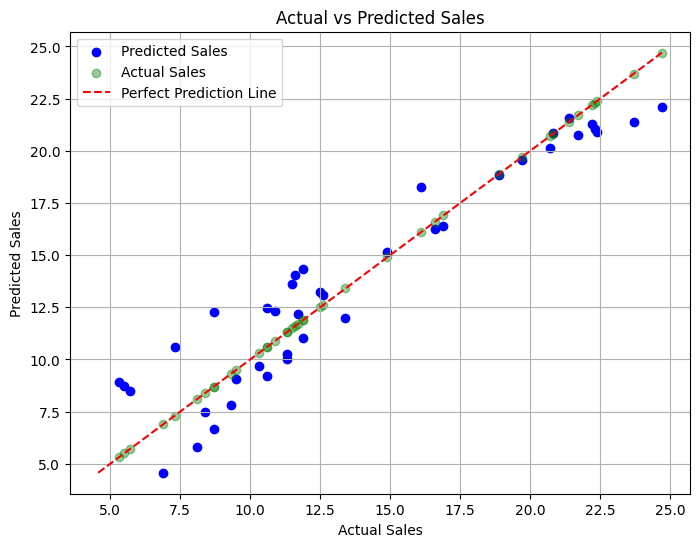

In [ ]:
 # Visualization – Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Sales')  # predicted points
plt.scatter(y_test, y_test, color='green', alpha=0.4, label='Actual Sales')  # actual points for reference

# Reference Line (Perfect Prediction)
max_val = np.max([y_test.max(), y_pred.max()])
min_val = np.min([y_test.min(), y_pred.min()])
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction Line')

plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.grid(True)
plt.show()

